# BEFORE
- download data
- initial formatting in Excel
- make a repository & commit in master
- change branch b1

# IMPORTS

In [82]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import median_absolute_error
from joblib import dump, load

# LOADING

In [2]:
housing_df=pd.read_excel("housing.xlsx")
housing_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# FORMATTING

In [3]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9    TAX      506 non-null    int64  
 10   PTRATIO  506 non-null    float64
 11   B        506 non-null    float64
 12   LSTAT    506 non-null    float64
 13   MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
old_columns_new_columns_dict={}
for i,j in zip(housing_df.columns,housing_df.columns.str.strip()):
    old_columns_new_columns_dict[i]=j
old_columns_new_columns_dict

{'CRIM    ': 'CRIM',
 'ZN      ': 'ZN',
 'INDUS   ': 'INDUS',
 'CHAS    ': 'CHAS',
 'NOX     ': 'NOX',
 'RM      ': 'RM',
 'AGE     ': 'AGE',
 'DIS     ': 'DIS',
 'RAD     ': 'RAD',
 ' TAX    ': 'TAX',
 ' PTRATIO': 'PTRATIO',
 ' B      ': 'B',
 ' LSTAT  ': 'LSTAT',
 ' MEDV   ': 'MEDV'}

In [5]:
housing_df_renamed_columns=housing_df.rename(columns=old_columns_new_columns_dict)
housing_df_renamed_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [89]:
housing_df_renamed_columns.to_csv("housing.csv",index=False)

# ANALYZE BEFORE SPLIT
- relationship btw features & target
- dispersion of features & target
- nature of features & target

In [6]:
housing_df_renamed_columns.corr().sort_values(by='MEDV',ascending=False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
MEDV,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.000000
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
B,-0.385064,0.175520,-0.356977,0.048788,-0.380051,0.128069,-0.273534,0.291512,-0.444413,-0.441808,-0.177383,1.000000,-0.366087,0.333461
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321


In [7]:
bin_size=int(np.ceil(np.sqrt(len(housing_df_renamed_columns))))
bin_size

23

array([[<Axes: title={'center': 'CRIM    '}>,
        <Axes: title={'center': 'ZN      '}>,
        <Axes: title={'center': 'INDUS   '}>,
        <Axes: title={'center': 'CHAS    '}>],
       [<Axes: title={'center': 'NOX     '}>,
        <Axes: title={'center': 'RM      '}>,
        <Axes: title={'center': 'AGE     '}>,
        <Axes: title={'center': 'DIS     '}>],
       [<Axes: title={'center': 'RAD     '}>,
        <Axes: title={'center': ' TAX    '}>,
        <Axes: title={'center': ' PTRATIO'}>,
        <Axes: title={'center': ' B      '}>],
       [<Axes: title={'center': ' LSTAT  '}>,
        <Axes: title={'center': ' MEDV   '}>, <Axes: >, <Axes: >]],
      dtype=object)

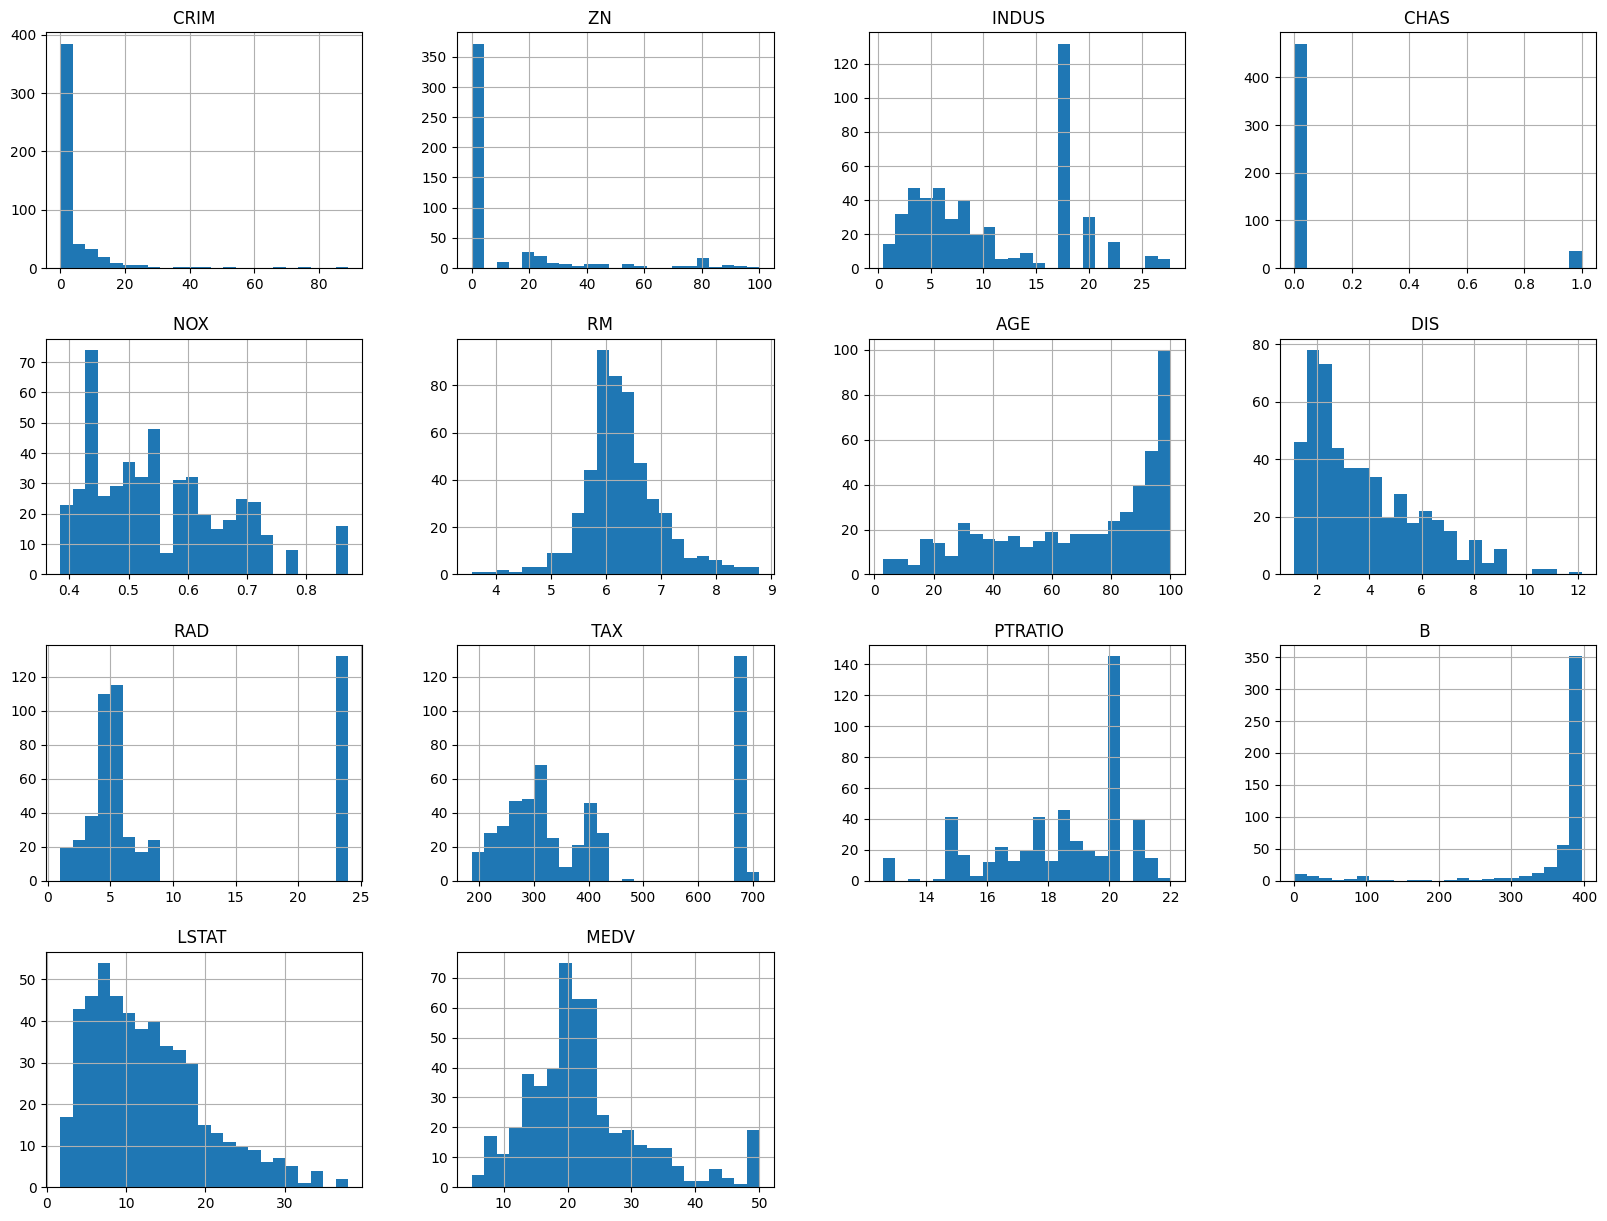

In [8]:
housing_df.hist(bins=bin_size,figsize=(20,15))

In [9]:
housing_df_renamed_columns.value_counts("CHAS")

CHAS
0    471
1     35
Name: count, dtype: int64

In [10]:
471/35

13.457142857142857

# COMMENTS ON DIFFERENT FEATURES
- CHAS :
    - 'CHAS' is strongly correlated with the target 'MEDV'
    - is a categorical data : 0s & 1s
    - 1s are the minority in the imbalanced data & split should be stratified to maintain the ratio of 1s in train & test data so that 1s are appropriately represented in both the data sets

# SPLIT

In [11]:
stratified_shuffle_split_object=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for i,j in stratified_shuffle_split_object.split(housing_df_renamed_columns,housing_df_renamed_columns.CHAS):
    train_indices_array=i
    test_indices_array=j
    
print(i.shape,j.shape,sep='\n')

(404,)
(102,)


In [12]:
train_set=housing_df_renamed_columns.iloc[i]
test_set=housing_df_renamed_columns.iloc[j]

# ANALYZE TRAIN SET

In [13]:
train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [14]:
correlation_df=train_set.corr().loc[:,['MEDV']].sort_values('MEDV',ascending=False)
correlation_df

,MEDV
MEDV,1.000000
RM,0.679894
B,0.361761
ZN,0.339741
DIS,0.240451
CHAS,0.205066
AGE,-0.364596
RAD,-0.374693
CRIM,-0.393715
NOX,-0.422873


In [15]:
strong_features_list=correlation_df.iloc[[0,1,2,-2,-1]].index.tolist()
strong_features_list

['MEDV', 'RM', 'B', 'PTRATIO', 'LSTAT']

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='B', ylabel='MEDV'>,
        <Axes: xlabel='PTRATIO', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='B', ylabel='RM'>,
        <Axes: xlabel='PTRATIO', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='B'>,
        <Axes: xlabel='RM', ylabel='B'>, <Axes: xlabel='B', ylabel='B'>,
        <Axes: xlabel='PTRATIO', ylabel='B'>,
        <Axes: xlabel='LSTAT', ylabel='B'>],
       [<Axes: xlabel='MEDV', ylabel='PTRATIO'>,
        <Axes: xlabel='RM', ylabel='PTRATIO'>,
        <Axes: xlabel='B', ylabel='PTRATIO'>,
        <Axes: xlabel='PTRATIO', ylabel='PTRATIO'>,
        <Axes: xlabel='LSTAT', ylabel='PTRATIO'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
      

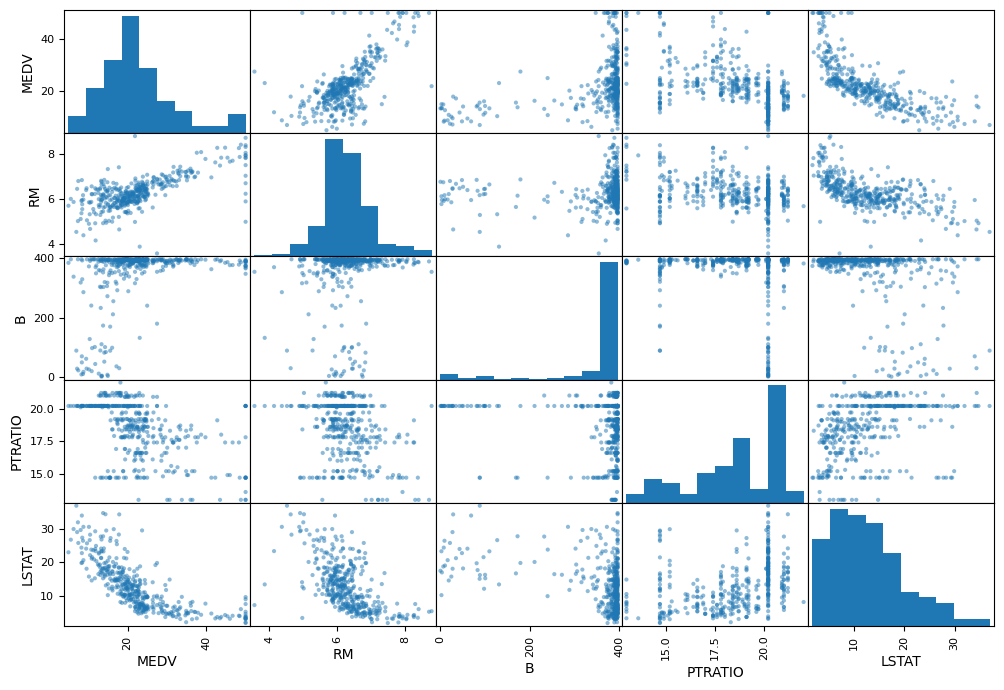

In [16]:
scatter_matrix(train_set[strong_features_list],figsize=(12,8))

# COMMENTS
- LSTAT & RM can be a good predictor for MEDV as we can see the trends(feature vs target)
- LSTAT & RM has outliers so we'll be working wiht median over mean

# SCALING

In [17]:
train_set_features=train_set.iloc[:,:13]
train_set_target=train_set.iloc[:,13]
train_set_features.shape

(404, 13)

In [18]:
pipeline_object=Pipeline([
    ('scaler', StandardScaler())
])

train_set_scaled_features_array=pipeline_object.fit_transform(train_set_features,train_set_target)
train_set_scaled_features_array.shape

(404, 13)

# MAKING DIFFERENT MODELS

`LINEAR REGRESSON`

In [19]:
linear_regression_model=LinearRegression()
linear_regression_model.fit(train_set_scaled_features_array,train_set_target)

LinearRegression()

In [20]:
coef_array=linear_regression_model.coef_
coef_array

array([-0.53859116,  0.82011884,  0.24916678,  0.84013464, -2.15381579,
        2.69919117,  0.24483568, -2.91024203,  2.42317778, -1.84376829,
       -2.12904379,  1.02858558, -4.08798371])

In [21]:
intercept=linear_regression_model.intercept_
intercept

22.509405940594053

In [22]:
print(f"Equation of the fitted model: y = {intercept:.2f} + {" + ".join([f"{i}x{j}" for i,j in zip(coef_array,range(1,14))])}")

Equation of the fitted model: y = 22.51 + -0.5385911641341117x1 + 0.8201188402342998x2 + 0.24916677757907552x3 + 0.8401346401009846x4 + -2.1538157939956815x5 + 2.699191169067207x6 + 0.2448356769498841x7 + -2.910242032776095x8 + 2.423177779825638x9 + -1.8437682880656885x10 + -2.1290437918665868x11 + 1.0285855814094458x12 + -4.0879837123334095x13


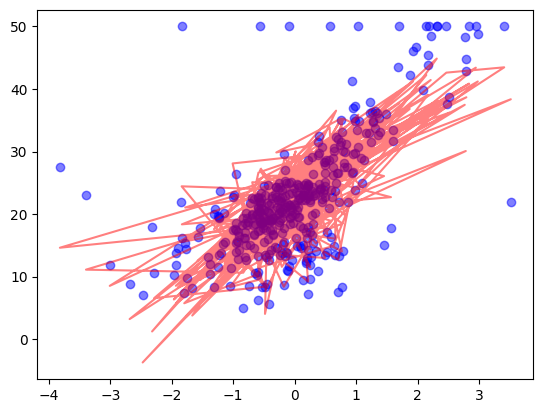

In [23]:
plt.scatter(train_set_scaled_features_array[:,5],train_set_target,color='blue',alpha=0.5)
plt.plot(train_set_scaled_features_array[:,5],linear_regression_model.predict(train_set_scaled_features_array),color='red',alpha=0.5)

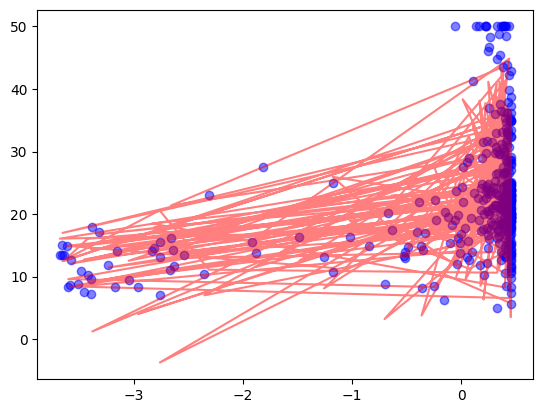

In [24]:
plt.scatter(train_set_scaled_features_array[:,-2],train_set_target,color='blue',alpha=0.5)
plt.plot(train_set_scaled_features_array[:,-2],linear_regression_model.predict(train_set_scaled_features_array),color='red',alpha=0.5)

`DECISION TREE REGRESSOR`

In [25]:
decision_tree_regressor_model=DecisionTreeRegressor()
decision_tree_regressor_model.fit(train_set_scaled_features_array,train_set_target)

DecisionTreeRegressor()

`RANDOM FOREST`

In [26]:
random_forest_regressor_model=RandomForestRegressor()
random_forest_regressor_model.fit(train_set_scaled_features_array,train_set_target)

RandomForestRegressor()

# EVALUATING DIFFERENT MODELS

In [69]:
scores_linear_regression_model=cross_val_score(linear_regression_model,train_set_scaled_features_array,train_set_target,scoring='neg_median_absolute_error',cv=10)
scores_linear_regression_model

array([-2.15405416, -2.47244373, -2.06053866, -2.40467438, -2.97380302,
       -3.38864855, -2.8671512 , -3.47883858, -2.3930248 , -2.62075215])

In [70]:
scores_decision_tree_regressor_model=cross_val_score(decision_tree_regressor_model,train_set_scaled_features_array,train_set_target,scoring='neg_median_absolute_error',cv=10)
scores_decision_tree_regressor_model

array([-2.4 , -1.9 , -2.2 , -1.9 , -2.4 , -2.1 , -1.95, -2.45, -2.05,
       -1.8 ])

In [71]:
scores_random_forest_regressor_model=cross_val_score(random_forest_regressor_model,train_set_scaled_features_array,train_set_target,scoring='neg_median_absolute_error',cv=10)
scores_random_forest_regressor_model

array([-1.498 , -1.486 , -1.577 , -1.285 , -1.7795, -1.5535, -1.6585,
       -1.7865, -1.7025, -1.499 ])

In [80]:
def evaluate(model,scores):
    print(f"medae_scores: {-scores}\nmean_medae: {np.mean(-scores)}\nstandar_deviation_medae: {np.std(scores)}\nnormalized_medae: {np.mean(-scores)/np.median(train_set_target):.2%}")

In [81]:
for i,j in zip([linear_regression_model,decision_tree_regressor_model,random_forest_regressor_model],[scores_linear_regression_model,scores_decision_tree_regressor_model,scores_random_forest_regressor_model]):
    print(f"->{i}")
    evaluate(i,j)
    print("\n")

->LinearRegression()
medae_scores: [2.15405416 2.47244373 2.06053866 2.40467438 2.97380302 3.38864855
 2.8671512  3.47883858 2.3930248  2.62075215]
mean_medae: 2.6813929240880454
standar_deviation_medae: 0.4611672672034397
normalized_medae: 12.68%


->DecisionTreeRegressor()
medae_scores: [2.4  1.9  2.2  1.9  2.4  2.1  1.95 2.45 2.05 1.8 ]
mean_medae: 2.1149999999999993
standar_deviation_medae: 0.22477766792988982
normalized_medae: 10.00%


->RandomForestRegressor()
medae_scores: [1.498  1.486  1.577  1.285  1.7795 1.5535 1.6585 1.7865 1.7025 1.499 ]
mean_medae: 1.5825499999999957
standar_deviation_medae: 0.14608327248525663
normalized_medae: 7.48%




In [79]:
np.median(train_set_target)

21.15

# SELECTION
- median absolute error of random_forest model is least(1.5825499999999957)
- selecting `RANDOM FOREST`

# TESTING

In [75]:
test_set_features=test_set.iloc[:,:13]
test_set_target=test_set.iloc[:,13]
test_set_features.shape

(102, 13)

In [76]:
test_set_scaled_features=pipeline_object.fit_transform(test_set_features,test_set_target)
test_set_scaled_features.shape

(102, 13)

In [83]:
prediction_set=random_forest_regressor_model.predict(test_set_scaled_features)
prediction_set

array([24.598, 10.004, 25.703, 21.711, 16.936, 14.926, 18.779, 14.98 ,
       32.707, 43.46 , 19.293,  9.003, 24.244, 29.989, 20.412, 12.621,
       32.928, 15.056, 23.576, 16.834, 19.069, 15.236, 18.022, 21.447,
       18.168, 30.867, 16.354, 32.514,  9.888, 34.333, 23.235, 21.427,
       23.008,  8.723, 19.64 , 12.125, 45.226, 23.8  , 23.97 , 44.392,
       23.424, 27.297, 20.042, 21.669, 15.499, 33.106, 45.009, 20.698,
       18.179, 21.949, 21.467, 14.947, 19.411, 14.336, 25.069, 34.069,
       42.92 , 28.172, 17.877, 20.753, 47.569, 10.921, 19.257, 23.616,
       14.514, 40.389, 19.009, 17.138, 17.995, 34.108, 26.329, 22.874,
       20.496, 23.18 , 35.318, 13.703, 15.356, 20.55 , 21.357, 21.211,
       22.441, 21.444, 14.368, 23.173, 21.141, 21.614, 14.121, 20.684,
       21.926, 23.53 , 17.904, 27.504,  8.511, 25.788, 16.019, 29.493,
       19.915, 31.019, 13.979, 26.747, 18.826, 17.545])

In [84]:
medae=median_absolute_error(prediction_set,test_set_target)

In [86]:
def test_result(parameter):
    print(f"medae: {parameter}\nnormalized_medae: {parameter/np.median(test_set_target):.2%}")

In [87]:
test_result(medae)

medae: 1.7614999999999998
normalized_medae: 8.19%


# DELIVERING MODEL

In [88]:
dump(random_forest_regressor_model,'house_price_predictor.joblib')

['house_price_predictor.joblib']